### **Simple linear regularization**

OLS Coefficient: 2.94, MSE: 3.84
Lasso (L1) Coefficient: 2.82, MSE: 3.95
Ridge (L2) Coefficient: 2.94, MSE: 3.84


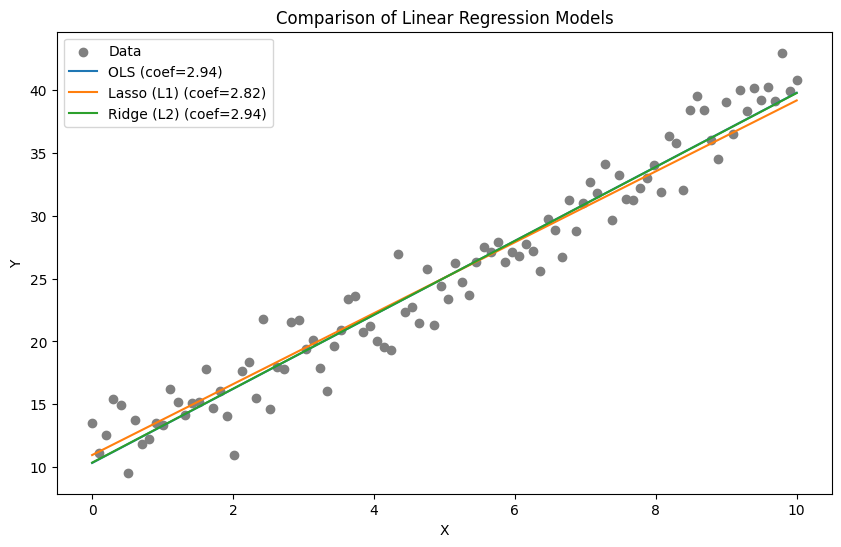

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Generate synthetic data
np.random.seed(0)
X = np.linspace(0, 10, 100)
y = 3 * X + np.random.randn(100) * 2 + 10

# Split data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1, 1), y, test_size=0.2, random_state=0)

# Initialize models
models = {
    "OLS": LinearRegression(),
    "Lasso (L1)": Lasso(alpha=1.0),
    "Ridge (L2)": Ridge(alpha=1.0)
}

# Fit models and store coefficients
coefficients = {}
predictions = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    coefficients[name] = model.coef_[0]
    predictions[name] = model.predict(X_test)

    # Output coefficients and MSE for each model
    mse = mean_squared_error(y_test, predictions[name])
    print(f"{name} Coefficient: {coefficients[name]:.2f}, MSE: {mse:.2f}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='gray', label='Data')
for name, model in models.items():
    plt.plot(X, model.predict(X.reshape(-1, 1)), label=f'{name} (coef={coefficients[name]:.2f})')

plt.title('Comparison of Linear Regression Models')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


***
### **Polonyminal regularisation**

In [ ]:
#  The complete code is at (https://github.com/ageron/handson-ml/blob/master/04_training_linear_models.ipynb)
from sklearn.linear_model import Ridge
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])



### L2 Regularization
The reason why Ridge regression is called the L2 regularization is because it puts the l2 norm  of the weight vector.
##### $J(\theta) = MSE(\theta) + \alpha \sum_{i=1}^n \left| \theta_i \right| $

In [ ]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

plt.show()

### L1 Regularization
The reason why Lasso regression is called the L1 regularization is because it puts the l1 norm  of the weight vector. 

 ##### $J(\theta) = MSE(\theta) + \alpha \frac{1}{2} \sum_{i=1}^n \theta_{i}^2 $

In [ ]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), tol=1, random_state=42)


plt.show()